<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/130324_fundus_internet_images_laterality_classification_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np

In [ ]:
os.listdir('/content/drive/MyDrive/Nornal internet findus photos/split')

['train', 'val', 'test']

In [ ]:
os.listdir('/content/drive/MyDrive/Nornal internet findus photos/split/train')

['RE fundus', 'LE fundus']

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
trainimages = datagen.flow_from_directory('/content/drive/MyDrive/Nornal internet findus photos/split/train',
                                          target_size=(224,224))

validationimages = datagen.flow_from_directory('/content/drive/MyDrive/Nornal internet findus photos/split/val',
                                          target_size=(224,224))

testimages = datagen.flow_from_directory('/content/drive/MyDrive/Nornal internet findus photos/split/test',
                                          target_size=(224,224))

Found 80 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [57]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model = Sequential([Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)),
                    MaxPooling2D(2,2),

                    Conv2D(32,(3,3), activation='relu'),
                    MaxPooling2D(2,2),

                    Conv2D(64,(3,3), activation='relu'),
                    MaxPooling2D(2,2),

                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(2, activation='softmax')])

model.compile(optimizer = "rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 111, 111, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 26, 26, 64)       

In [58]:
model.fit(trainimages,
          batch_size = 10,
          epochs = 10,
          validation_data = validationimages)

model.save('funduslaterality_model.keras')


Epoch 1/10
3/3 [==============================] - 11s 3s/step - loss: 3.9523 - accuracy: 0.5375 - val_loss: 0.7064 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 7s 2s/step - loss: 0.7233 - accuracy: 0.5125 - val_loss: 0.7110 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 6s 2s/step - loss: 0.7266 - accuracy: 0.3875 - val_loss: 0.6666 - val_accuracy: 0.8000
Epoch 4/10
3/3 [==============================] - 8s 3s/step - loss: 0.6290 - accuracy: 0.7000 - val_loss: 0.6421 - val_accuracy: 0.7000
Epoch 5/10
3/3 [==============================] - 6s 2s/step - loss: 0.5797 - accuracy: 0.8000 - val_loss: 0.6330 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 9s 2s/step - loss: 0.5175 - accuracy: 0.8125 - val_loss: 0.5208 - val_accuracy: 0.8000
Epoch 7/10
3/3 [==============================] - 7s 3s/step - loss: 0.5702 - accuracy: 0.7250 - val_loss: 0.6408 - val_accuracy: 0.7000
Epoch 8/10
3/3 [========================

In [59]:
y_pred = model.predict(testimages)
y_pred

1/1 [==============================] - 0s 299ms/step


array([[0.00488084, 0.99511915],
       [0.05002877, 0.9499712 ],
       [0.0180438 , 0.9819562 ],
       [0.17873429, 0.82126564],
       [0.01054018, 0.9894598 ],
       [0.04275258, 0.95724744],
       [0.12079747, 0.8792026 ],
       [0.15245989, 0.84754014],
       [0.5345593 , 0.46544072],
       [0.0520284 , 0.9479716 ]], dtype=float32)

In [60]:
y_true = testimages.classes
y_true

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [61]:
y_pred1=np.argmax(y_pred,axis=1)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [62]:
from sklearn import metrics
metrics.confusion_matrix(y_true,y_pred1)

array([[0, 5],
       [1, 4]])

In [ ]:
testimages.class_indices

{'LE fundus': 0, 'RE fundus': 1}

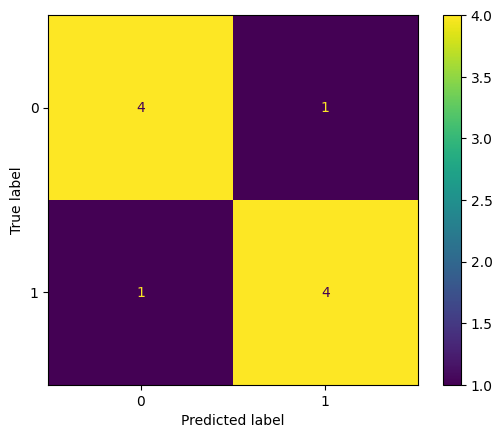

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true,y_pred1)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_true, y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



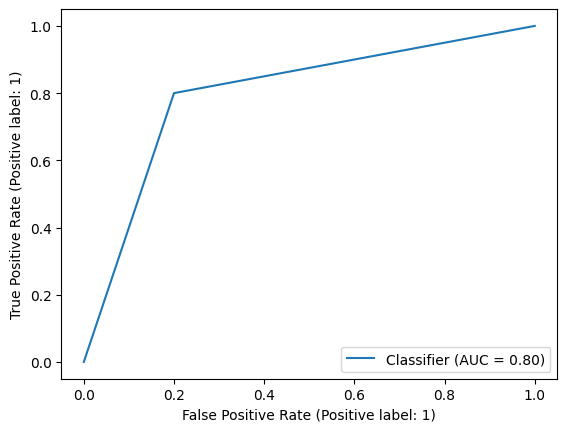

In [ ]:
metrics.RocCurveDisplay.from_predictions(y_true,y_pred1)

1/1 [==============================] - 0s 174ms/step
Prediction: left eye fundus


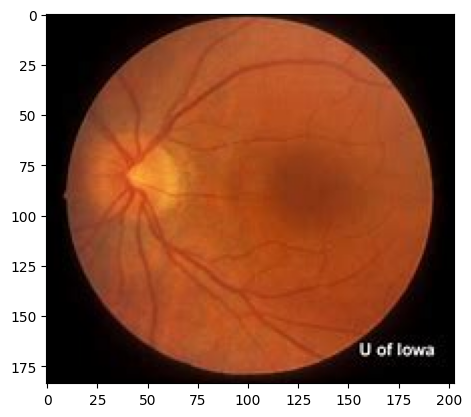

In [25]:
from keras.preprocessing import image
from keras.models import load_model

# Load the trained CNN model
model = load_model('/content/funduslaterality_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(224,224))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability
    class_names = ['left eye fundus', 'right eye fundus']  # Example class names, modify as per your multiclass classes
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Example usage:
unknown_image_path = '/content/drive/MyDrive/Nornal internet findus photos/LE fundus/OIP (8).jpg' # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/Nornal internet findus photos/LE fundus/OIP (8).jpg')
plt.imshow(testimage)


1/1 [==============================] - 0s 58ms/step
Prediction: right eye fundus


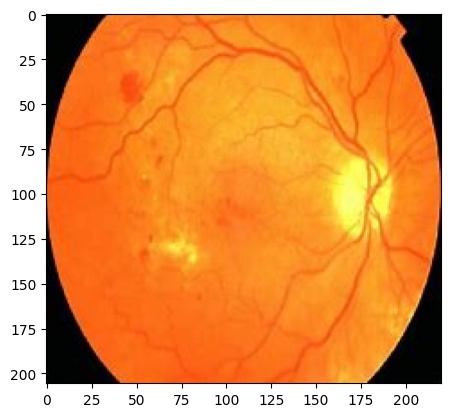

In [26]:
# Example usage:
unknown_image_path = '/content/drive/MyDrive/Nornal internet findus photos/split/test/RE fundus/download (41).jpg'
# Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/Nornal internet findus photos/split/test/RE fundus/download (41).jpg')
plt.imshow(testimage)

